In [1]:
#gerekli kütüphaneleri alıyoruz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm


In [2]:
#veri setini CSV uzantılı dosyadan aldık
data = pd.read_csv("dataset_Facebook.csv", delimiter=';')


In [3]:
# DataFrame'deki tüm sütun isimlerini al
tum_sutunlar = data.columns.tolist()

# Tüm sütun isimlerini ekrana yazdır
print(tum_sutunlar)

['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday', 'Post Hour', 'Paid', 'Lifetime Post Total Reach', 'Lifetime Post Total Impressions', 'Lifetime Engaged Users', 'Lifetime Post Consumers', 'Lifetime Post Consumptions', 'Lifetime Post Impressions by people who have liked your Page', 'Lifetime Post reach by people who like your Page', 'Lifetime People who have liked your Page and engaged with your post', 'comment', 'like', 'share', 'Total Interactions']


In [4]:
# Kullanılmayan sütunları belirle (örneğin, kullanılmayan_sutun_1, kullanılmayan_sutun_2)
kullanilmayan_sutunlar =['Lifetime Post Total Reach', 'Lifetime Post Total Impressions', 'Lifetime Engaged Users', 'Lifetime Post Consumers', 'Lifetime Post Consumptions', 'Lifetime Post Impressions by people who have liked your Page', 'Lifetime Post reach by people who like your Page', 'Lifetime People who have liked your Page and engaged with your post', 'comment', 'like', 'share'] 


# Kullanılmayan sütunları veri setinden sil
data = data.drop(kullanilmayan_sutunlar, axis=1)
# Değişiklikleri kaydet
#data.to_csv('dataset_Facebook.csv', index=False)  # index=False ile indeksi kaydetmez


In [5]:
#verileri kontrol edilip boşlukları ortalama değer ile doldurma kısmı 
print(data.isnull().sum())
numeric_columns = data.select_dtypes(include='number').columns.tolist()
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

Page total likes      0
Type                  0
Category              0
Post Month            0
Post Weekday          0
Post Hour             0
Paid                  1
Total Interactions    0
dtype: int64


In [6]:
# 'Type' sütununu dönüştürelim
type_mapping = {'Photo': 1, 'Status': 2, 'Link': 3, 'Video': 4}
data['Type'] = data['Type'].map(type_mapping).fillna(data['Type'])

# 'Type_Encoded' sütununu kontrol edelim
print(data['Type'].value_counts())

1    426
2     45
3     22
4      7
Name: Type, dtype: int64


In [7]:
data['Combined_Column'] = round(data['Page total likes'] * data['Post Hour'] - (data['Post Weekday'] / data['Post Month']))

# Yeni özelliği oluşturma
data['Combined_Column_with_Type'] = round(data['Page total likes'] * data['Post Hour'] - (data['Post Weekday'] / data['Post Month'])) * data['Type']


# Sonuçları gözden geçirelim
print(data.head())

   Page total likes  Type  Category  Post Month  Post Weekday  Post Hour  \
0            139441     1         2          12             4          3   
1            139441     2         2          12             3         10   
2            139441     1         3          12             3          3   
3            139441     1         2          12             2         10   
4            139441     1         2          12             2          3   

   Paid  Total Interactions  Combined_Column  Combined_Column_with_Type  
0   0.0                 100         418323.0                   418323.0  
1   0.0                 164        1394410.0                  2788820.0  
2   0.0                  80         418323.0                   418323.0  
3   1.0                1777        1394410.0                  1394410.0  
4   0.0                 393         418323.0                   418323.0  


In [8]:
#bağımsız değişkenleri (X) ve bağımlı değişkeni (y) belirledik
X = data[['Category', 'Page total likes', 'Post Month', 'Post Hour', 'Post Weekday', 'Paid', 'Combined_Column',]]
y = data['Total Interactions']


# Yeni veri setini gözden geçir
print(data.head())

   Page total likes  Type  Category  Post Month  Post Weekday  Post Hour  \
0            139441     1         2          12             4          3   
1            139441     2         2          12             3         10   
2            139441     1         3          12             3          3   
3            139441     1         2          12             2         10   
4            139441     1         2          12             2          3   

   Paid  Total Interactions  Combined_Column  Combined_Column_with_Type  
0   0.0                 100         418323.0                   418323.0  
1   0.0                 164        1394410.0                  2788820.0  
2   0.0                  80         418323.0                   418323.0  
3   1.0                1777        1394410.0                  1394410.0  
4   0.0                 393         418323.0                   418323.0  


In [9]:
# Yeni veri setini gözden geçir
print(data.head())

   Page total likes  Type  Category  Post Month  Post Weekday  Post Hour  \
0            139441     1         2          12             4          3   
1            139441     2         2          12             3         10   
2            139441     1         3          12             3          3   
3            139441     1         2          12             2         10   
4            139441     1         2          12             2          3   

   Paid  Total Interactions  Combined_Column  Combined_Column_with_Type  
0   0.0                 100         418323.0                   418323.0  
1   0.0                 164        1394410.0                  2788820.0  
2   0.0                  80         418323.0                   418323.0  
3   1.0                1777        1394410.0                  1394410.0  
4   0.0                 393         418323.0                   418323.0  


In [10]:
#verileri ölçeklendirdik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
#veri setini %80 eğitim ve %20 test verisi olacak şekilde böldük/ayırdık 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=39)


In [15]:
#doğrusal regresyon modelini oluşturduk
model = LinearRegression()
model.fit(X, y)

model = LinearRegression().fit(X, y)



In [16]:
#doğrusal regresyon modelini oluşturduk
model = sm.OLS(y,X)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:     Total Interactions   R-squared (uncentered):                   0.267
Model:                            OLS   Adj. R-squared (uncentered):              0.256
Method:                 Least Squares   F-statistic:                              25.64
Date:                Thu, 14 Dec 2023   Prob (F-statistic):                    6.39e-30
Time:                        15:35:55   Log-Likelihood:                         -3669.6
No. Observations:                 500   AIC:                                      7353.
Df Residuals:                     493   BIC:                                      7383.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [17]:
#doğrusal regresyon modelini oluşturduk
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
#eğitim ve test setleri üzerinde tahminler yapıldığı kısım
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [19]:

#modelin ağırlık katsayılarını aldık
weights = model.coef_


In [20]:
#performans ölçümlerini hesapladık
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)


In [21]:
#eğitim seti için R-kare değerini hesapladık
r2_train = r2_score(y_train, y_train_pred)
#test seti için R-kare değerini hesapladık
r2_test = r2_score(y_test, y_test_pred)
#eğitim seti için Ortalama Mutlak Hata değerini hesapladık
mae_train = mean_absolute_error(y_train, y_train_pred)
#test seti için Ortalama Mutlak Hata değerini hesapladık
mae_test = mean_absolute_error(y_test, y_test_pred)



In [22]:
#sonuçları ekrana yazdırıyoruz
print("Eğitim Seti R-kare Değeri:", r2_train)
print("Test Seti R-kare Değeri:", r2_test)
print("Eğitim Seti MSE Değeri:", train_error)
print("Test Seti MSE Değeri:", test_error)
print("Eğitim Seti MAE Değeri:", mae_train)
print("Test Seti MAE Değeri:", mae_test)
print("Ağırlık Vektörü:", weights)

Eğitim Seti R-kare Değeri: 0.04025548236046672
Test Seti R-kare Değeri: 0.022334855819556965
Eğitim Seti MSE Değeri: 141562.2663911306
Test Seti MSE Değeri: 126116.26274533397
Eğitim Seti MAE Değeri: 152.55195951631106
Test Seti MAE Değeri: 189.8391811126613
Ağırlık Vektörü: [  36.9301382   137.24348122  -55.60310519  239.44700083  -23.83007583
   35.72628372 -262.83641582]


Text(0.5, 1.0, 'Eğitim Seti')

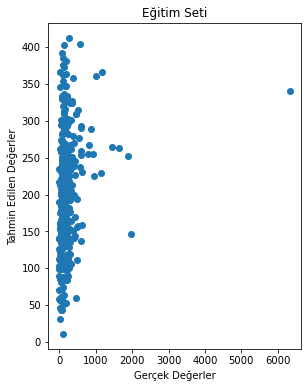

In [23]:
#eğitim ve test setlerinde gerçek ve tahmin edilen değerleri görselleştirdik
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Eğitim Seti")


Text(0.5, 1.0, 'Test Seti')

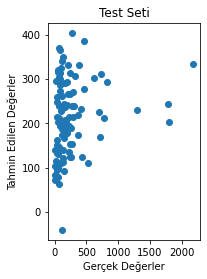

In [24]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Test Seti")


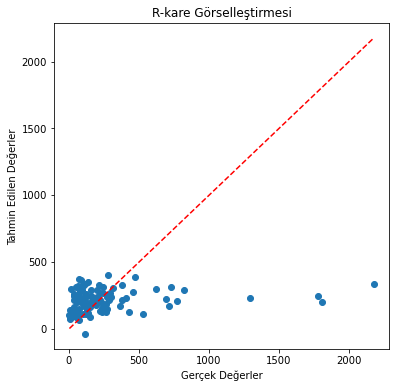

In [25]:
#r-kareyi görselleştirme işlemi
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # 45 derecelik bir doğru
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("R-kare Görselleştirmesi")
plt.show()


Ağırlık Matrisi: [ 29.61673422  21.89886637   0.27853811  -9.07327963 -21.70874543
  29.74788445 -16.12617546]
Eğitim Seti Toplam Kare Hatayı (SSE): 184178.01854153062
Test Seti Toplam Kare Hatayı (SSE): 188146.77081449793


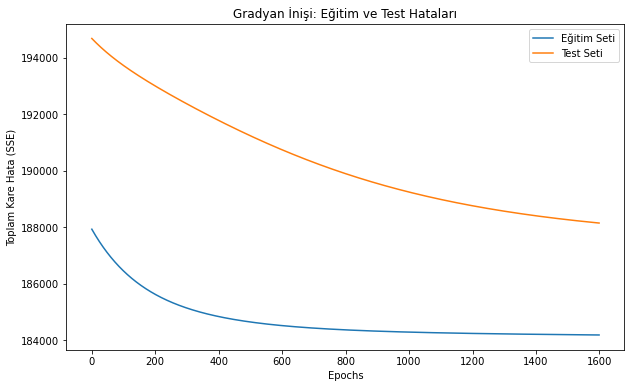

In [34]:
#gradyan inişi fonksiyonu tanımladık
def gradient_descent(X, y, learning_rate=0.01, epochs=500):
    #bağımsız değişkenlerin özellik sayısını al
    num_features = X.shape[1]
    
    #agırlıkları sıfırlar ile başlat
    weights = np.zeros(num_features)
    
    #veri kümesindeki gözlem sayısını al
    n = len(y)
    
    #eğitim ve test seti hatalarını saklamak için boş listeler oluştur
    SSE_train = []
    SSE_test = []

    #belirlenen epoch sayısı kadar iterasyon yap
    for epoch in range(epochs):
        # Modelin güncel ağırlıklarıyla tahmin yapılır
        y_pred = np.dot(X, weights)
        
        #hata hesaplanıyor
        error = y_pred - y
        
        #gradyanı iniş algoritmasını güncelliyoruz
        gradient = (2/n) * np.dot(X.T, error) # --> Hatanın bağımsız değişkenlerinin transpoze matrisi ile çarpılmasıdır.ve her bir özelliğin hataya olan katkısını gösteren bir vektörü üretir.
        
        # Ağırlıkları güncelliyoruz
        weights -= learning_rate * gradient
        
        #eğitim seti üzerindeki hatayı kaydediyoruz
        SSE_train.append(np.sum(error**2) / n)
        
        #test seti üzerindeki hatayı kaydediyoruz
        SSE_test.append(np.sum((np.dot(X_test, weights) - y_test)**2) / len(y_test))
        
    #son ağırlıkları, eğitim seti hataları ve test seti hatalarını döndürüyoruz
    return weights, SSE_train, SSE_test

#gradyan inişini için tanımladığımız fonksiyonu çağırıyoruz
weights, train_error, test_error = gradient_descent(X_train, y_train, learning_rate=0.001, epochs=1600)

#gradyan inişi sonuçlarını ekrana yazdırıyoruz
print("Ağırlık Matrisi:", weights)
print("Eğitim Seti Toplam Kare Hatayı (SSE):", train_error[-1])
print("Test Seti Toplam Kare Hatayı (SSE):", test_error[-1])

#gradyan inişinin eğitim ve test hatalarını görselleştiriyoruz
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_error)), train_error, label='Eğitim Seti')
plt.plot(range(len(test_error)), test_error, label='Test Seti')
plt.xlabel('Epochs')
plt.ylabel('Toplam Kare Hata (SSE)')
plt.title('Gradyan İnişi: Eğitim ve Test Hataları')
plt.legend()
plt.show()